## Word2Vec using NLTK/Glove/GoogleNews

#### Import Libraries

In [20]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from IPython.display import Image # To view image from location/url
import keras
import nltk
import logging
import multiprocessing
import re
import os
import gensim
from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import gensim.models.keyedvectors as word2vec
from nltk.corpus import brown, movie_reviews, treebank
from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets
from IPython.display import display

# Input & Output files path
inputDir = "./data/"
outputDir = "./data/outDir/"
inputDir_BigFiles = "E:/BigFiles/"
outputDir_Bigfiles = "E:/BigFiles/outDir/"

#### Load NLTK model

In [21]:
brown_model = Word2Vec(brown.sents(),workers=multiprocessing.cpu_count())
brown_model.save(outputDir+"brown_model")
size = str(round((os.path.getsize(outputDir+'brown_model')/1000),1))
print('Brown corpus model saved at '+outputDir+ '\nSize of file :'+size+ ' KB' )

Brown corpus model saved at ./data/outDir/
Size of file :19169.3 KB


#### Test NLTK model

In [22]:
# Brown
print(brown_model.most_similar('money', topn=5))
#find the odd one out
print (brown_model.doesnt_match("breakfast cereal dinner lunch".split()))
#vector representation of word human
#print (brown_model["human"])

[('care', 0.9144314527511597), ('chance', 0.8989047408103943), ('job', 0.8943670392036438), ('trouble', 0.8634209632873535), ('easy', 0.8590571284294128)]
cereal


#### Load Glove model

In [25]:
# Convert glove_input_file in GloVe format into word2vec_output_file in word2vec format.
gensim.scripts.glove2word2vec.glove2word2vec(glove_input_file = inputDir_BigFiles+"glove.6B/glove.6B.50d.txt", 
                                             word2vec_output_file = outputDir_Bigfiles+"word2vec_glove_file")
size = str(round((os.path.getsize(outputDir_Bigfiles+"word2vec_glove_file")/1000000),1))
print('Glove model size :'+size+ ' MB')
# Load GloVe: Global Vectors for Word Representation Word2Vec model.
glove_model = word2vec.KeyedVectors.load_word2vec_format(outputDir_Bigfiles+"word2vec_glove_file")

Glove model size :171.4 MB


#### Test Glove model

In [26]:
print(glove_model.most_similar('messi', topn=5))
#find the odd one out
print (glove_model.doesnt_match("cricket football sports lunch".split()))

[('ronaldinho', 0.9371346235275269), ('rivaldo', 0.9020113348960876), ('ronaldo', 0.8994787931442261), ('figo', 0.8895716667175293), ("eto'o", 0.8803616166114807)]
lunch


#### Load Google Word2Vec model

In [28]:
# Load Google's pre-trained Word2Vec model.
google_model = word2vec.KeyedVectors.load_word2vec_format \
(inputDir_BigFiles+'GoogleNews_w2v/GoogleNews-vectors-negative300.bin', binary=True) 
size = str(round((os.path.getsize(inputDir_BigFiles+'GoogleNews_w2v/GoogleNews-vectors-negative300.bin')/1000000),1))
print('Google model size :'+size+ ' MB')

Google model size :3644.3 MB


#### Test Google Word2Vec model

In [29]:
print(google_model.most_similar('cricket', topn=5))
#find the odd one out
print (google_model.doesnt_match("cricket football sports lunch kohli".split()))

[('cricketing', 0.8372225761413574), ('cricketers', 0.8165745735168457), ('Test_cricket', 0.8094819784164429), ('Twenty##_cricket', 0.8068488240242004), ('Twenty##', 0.7624265551567078)]
lunch


#### Visualizing Word2Vec

TSNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional  vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words.

In [17]:
### Define function to visualise the model

In [18]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

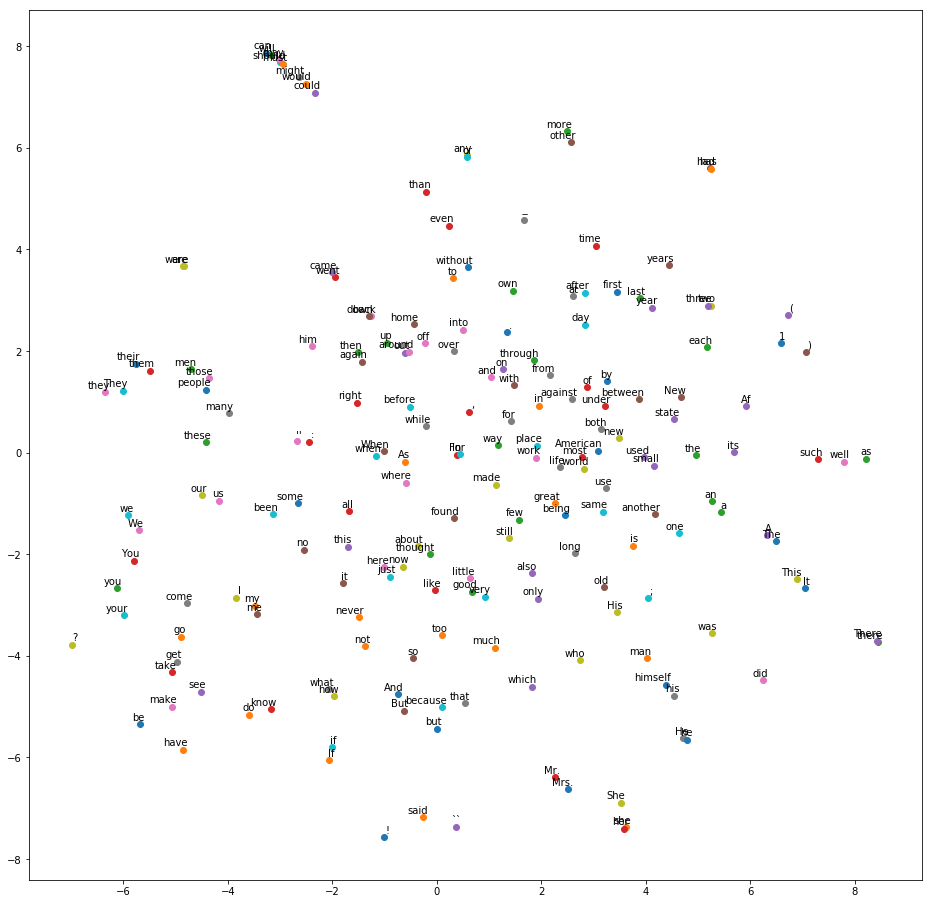

In [30]:
brown_model = Word2Vec(brown.sents(),workers=multiprocessing.cpu_count(),min_count=500)
tsne_plot(brown_model)